In [1]:
%matplotlib ipympl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='colorblind')

# Data Analysis and Visualization of Titanic Dataset

## Load the datasets

In [2]:
df_labelled = pd.read_csv('dataset\\train.csv')
df_unlabelled = pd.read_csv('dataset\\test.csv')

Let's take a look at the first 10 rows of both datasets to understand their structure and the kind of data they contain.

In [3]:
df_labelled.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_unlabelled.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Notes on some the columns:
- PassengerId looks like a unique identifier for each passenger, it may have been added later. Probably not useful for prediction.
- Survived is not present in the test set. We can assume that this is the target variable we want to predict (0 = No, 1 = Yes).
- The Age column has some missing values, which we will need to handle later.
- Ticket column seems to be a mix of letters and numbers, not standardised. We may need to process this further.
- Cabin has many missing values, we may need to drop this column.

In [5]:
df_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


The total number of entries is 891 for the training set and 418 for the test set.

In [7]:
df_labelled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df_unlabelled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


Notes on the datasets:
- The survival rate in the training set is approximately 38.4%.
- At least 50% of the passengers were in third class (Pclass = 3).
- Most passengers were quite young, 75% were below 38 (training set) and 39 (test set) years old.
- More than half of the passengers travelled alone (SibSp + Parch = 0).
- More than 75% of the passengers travelled without parents or children (Parch = 0).
- The minimum fare paid was 0, which is interesting, maybe some passengers were crew members or had free tickets, or children don't pay.
- One line in the test set doesn't have a fare value, we will need to handle this later.

In [9]:
df_labelled.describe(include=['O']).transpose()

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [10]:
df_unlabelled.describe(include=['O']).transpose()

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


Notes on the datasets:
- The name column has unique values for each passenger
- There are 577 (train set) and 266 (test set) males out of 891 and 418 passengers respectively. This means that there are 891 - 577 = 314 (train set) and 418 - 266 = 152 (test set) females.
- Tickets are not unique, there are 681 unique tickets in the training set and 363 in the test set. This means that some passengers share the same ticket, probably families or groups travelling together.
- Cabin has many missing values, not unique values, and some cabins are shared by multiple passengers. We may need to drop this column.
- Embarked has 2 missing values in the training set. Probably some passengers didn't report this information, or snuck in without embarking.

## Key questions to answer

In order to understand the factors that influenced survival on the Titanic, we can explore the following key questions. Each question is tied to a feature in the dataset.

In [11]:
def pivot_survival_table(df, target_column):
    df_pivot = pd.pivot_table(
        df[['PassengerId', target_column, 'Survived']],
        index=target_column,
        columns='Survived',
        aggfunc='count',
        fill_value=0
    ).reset_index()

    df_pivot.columns = [target_column, 'Not Survived', 'Survived']
    df_pivot['Num of passengers'] = df_pivot['Not Survived'] + df_pivot['Survived']
    df_pivot['Survival Rate (%)'] = (df_pivot['Survived'] / df_pivot['Num of passengers']) * 100

    return df_pivot

This function takes the dataset as input, the target column (Survived), it creates a pivot table to calculate the number of survivors and non-survivors for each category in the specified column, then adds two new columns to calculate the total number of passengers and the survival rate for each category.

### 1. Do older passengers and children have a higher survival rate? (Age)

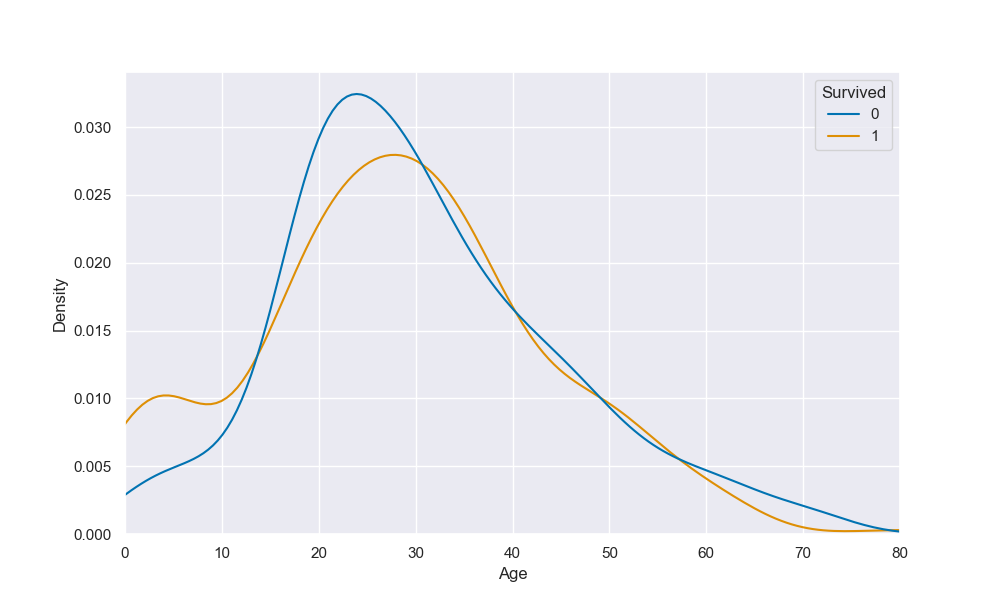

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=df_labelled, x='Age', hue='Survived', common_norm=False, ax=ax)

plt.xlim(0, df_labelled['Age'].max())
plt.show()

We plot the distribution of ages for survivors and non-survivors using a kernel density estimate (KDE) plot. This allows us to see if there are any age groups that had a higher survival rate. 
We can see that below about 13 years old, the survival rate is higher. 
Meanwhile, older passengers (above 58) have a lower survival rate.
We cannot compute the survival rate for a continuous variable like age. So we bin the ages into three groups: children (0-13), adults (13-58),  and seniors (58+). If the age is missing, we assign it to a separate group called 'no age'.

In [13]:
def age_category(age):
    if age < 13:
        return 'child'
    elif age >= 58:
        return 'senior'
    elif 13 <= age < 58:
        return 'adult'
    else:
        return 'no age'
    
df_labelled['Age Category'] = df_labelled['Age'].apply(age_category)
df_unlabelled['Age Category'] = df_unlabelled['Age'].apply(age_category)
pivot_survival_table(df_labelled, 'Age Category')

,Age Category,Not Survived,Survived,Num of passengers,Survival Rate (%)
0,adult,372,240,612,39.215686
1,child,29,40,69,57.971014
2,no age,125,52,177,29.378531
3,senior,23,10,33,30.303030


We can see from the table that children have a significant survival rate of 57.97%, while seniors have a lower survival rate of 30.30% which is lower than the overall survival rate (38.38%).

### 2. Do passenger of an higher Pclass have a higher survival rate? (Pclass)

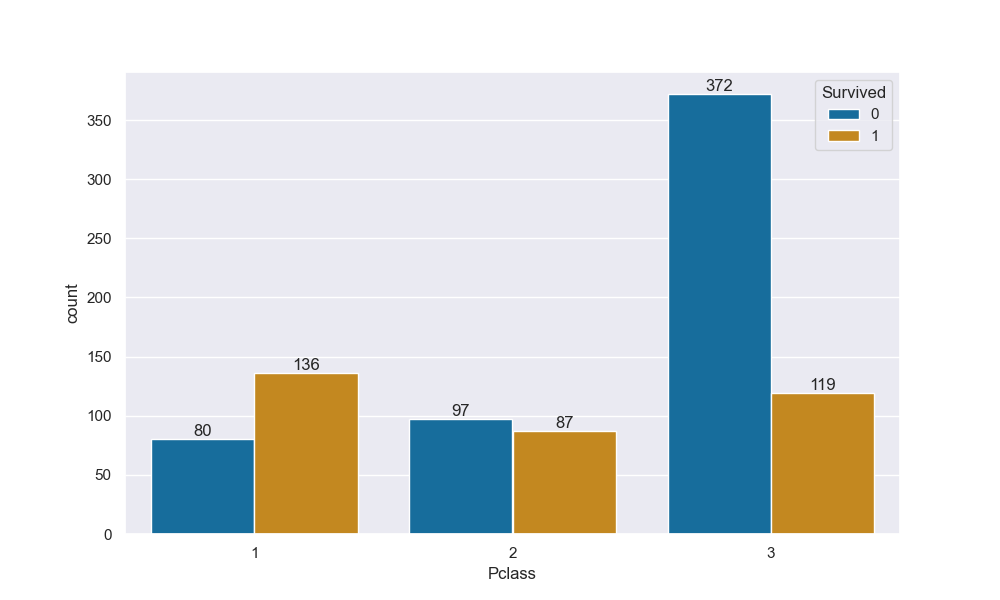

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df_labelled, x='Pclass', hue='Survived', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

We can see here that passengers in first class have higher survival rates compared to those in second and third class. Those in the third class had the lowest odds of survival.

In [15]:
pivot_survival_table(df_labelled, 'Pclass')

,Pclass,Not Survived,Survived,Num of passengers,Survival Rate (%)
0,1,80,136,216,62.962963
1,2,97,87,184,47.282609
2,3,372,119,491,24.236253


### 3. Do passengers with a higher fare have a higher survival rate? (Fare)

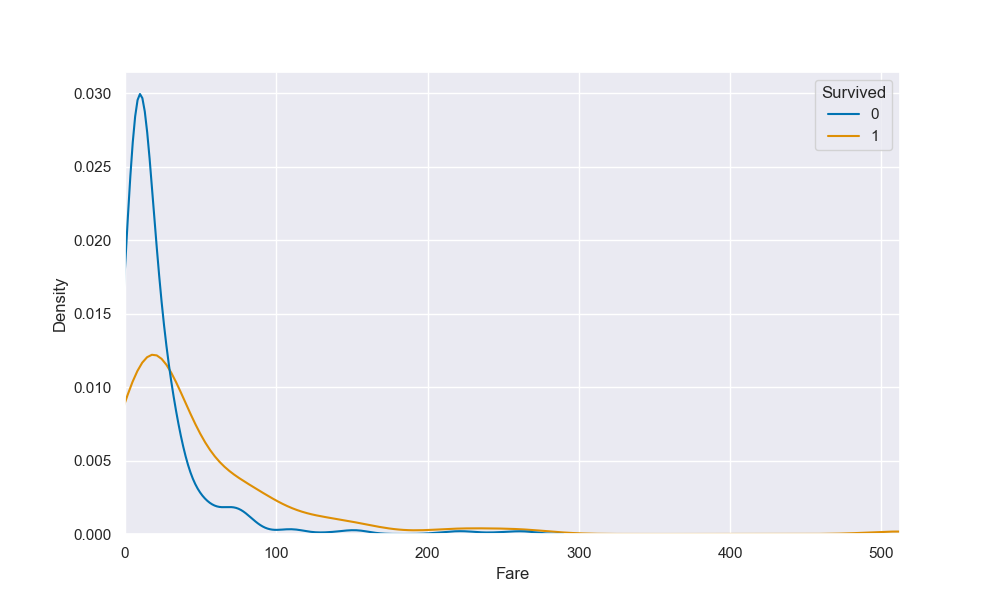

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=df_labelled, x='Fare', hue='Survived', common_norm=False, ax=ax)

plt.xlim(0, df_labelled['Fare'].max())
plt.show()

Passengers with a fare lower than approximately 30 had a really low surival rate. The chance of survival exceeds that of non-survival for fares above 30.

### 4. Did women have a higher survival rate? (Sex)

According to wikipedia: '"Women and children first", known to a lesser extent as the Birkenhead drill, is an unofficial code of conduct and gender role whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited.'. Let's see if this was applied on the Titanic.

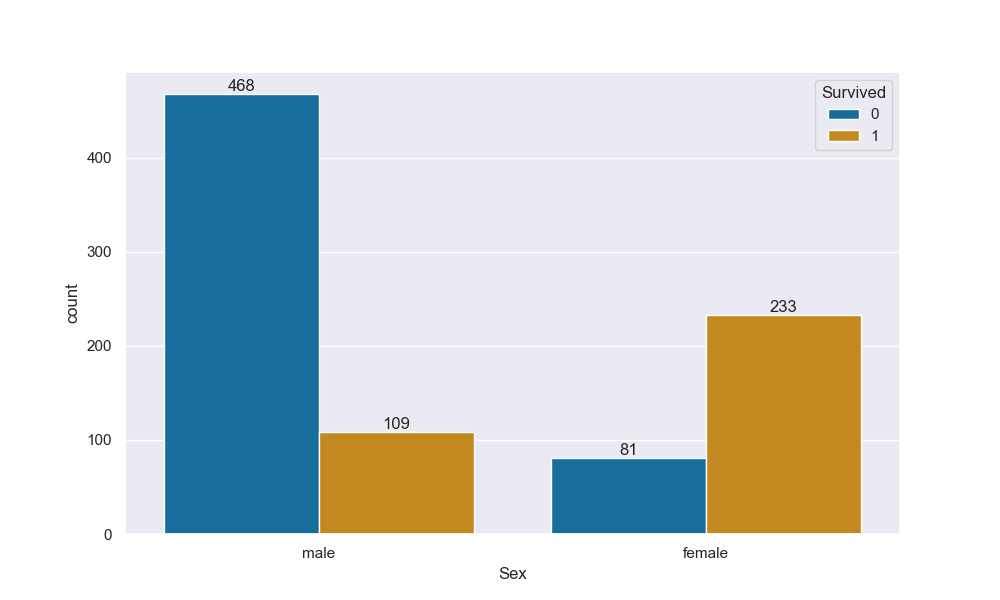

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df_labelled, x='Sex', hue='Survived', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

In [18]:
pivot_survival_table(df_labelled, 'Sex')

,Sex,Not Survived,Survived,Num of passengers,Survival Rate (%)
0,female,81,233,314,74.203822
1,male,468,109,577,18.890815


If the passenger was a woman, her chance of survival was significantly higher (74.20%) compared to that of a man (18.89%).

### Did the harbour influence the survival rate? (Embarked)

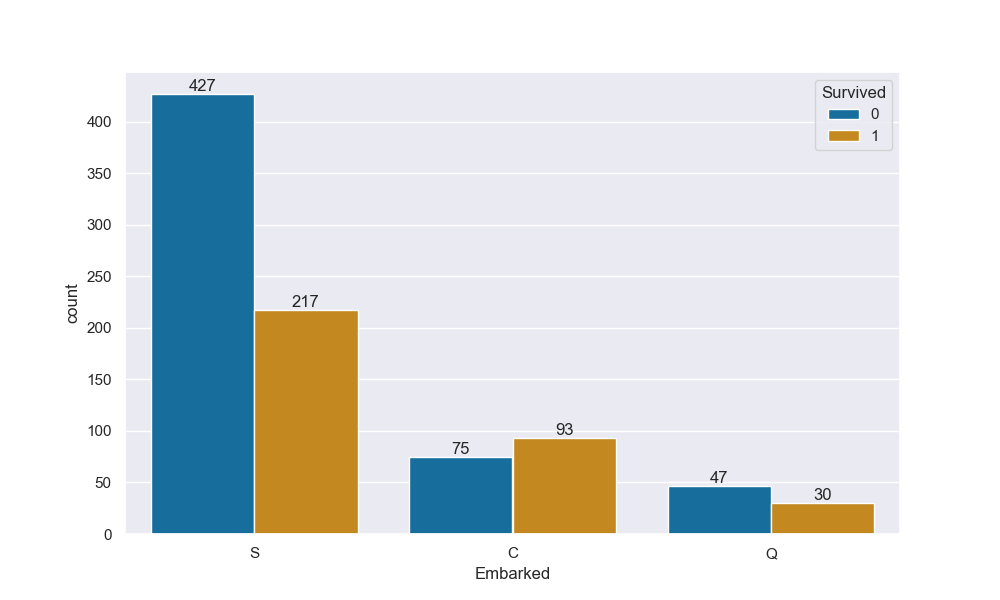

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df_labelled, x='Embarked', hue='Survived', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

In [20]:
pivot_survival_table(df_labelled, 'Embarked')

,Embarked,Not Survived,Survived,Num of passengers,Survival Rate (%)
0,C,75,93,168,55.357143
1,Q,47,30,77,38.961039
2,S,427,217,644,33.695652


Only people who embarked from Cherbourg (C) have a higher probability of surviving than dying (55.36%)

## Let's analyse the survival rate for combinations of features

### Survival rate for Sex and Pclass

Given that both Sex and Pclass individually show high survival rates, we can combine them to see how the latter is affected by the former. 

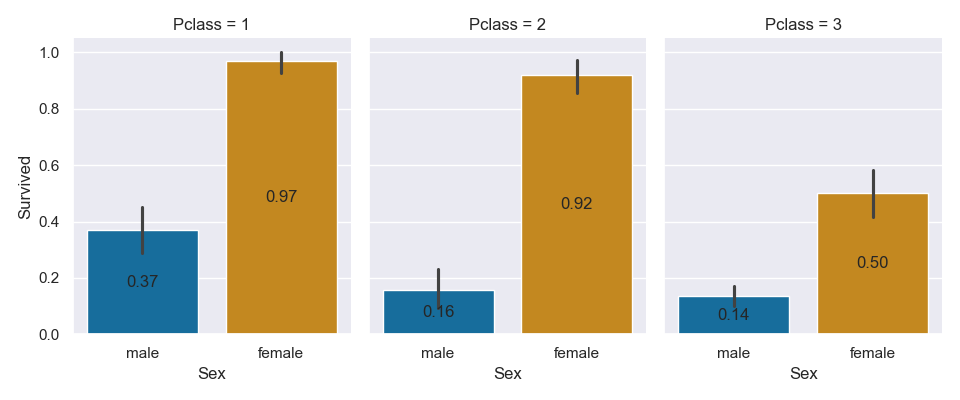

In [21]:
g = sns.catplot(data=df_labelled, x='Sex', hue='Sex', y='Survived', col='Pclass', kind='bar', height=4, aspect=0.8)

for i in range(len(set(g.col_names))):
    ax = g.axes[0, i]
    for container in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in container]
        ax.bar_label(container, labels=labels, label_type='center')

From the plots we can see that:
- women in first and second class had a very high survival rate (97% and 92% respectively).
- women in the third class had a higher survival rate than the men in the first class (50% vs 37%).
- the survival rate of men from the first class (37%) was twice that of those from the second class and third class (16% and 14% respectively).

### Survival rate for Age and Pclass

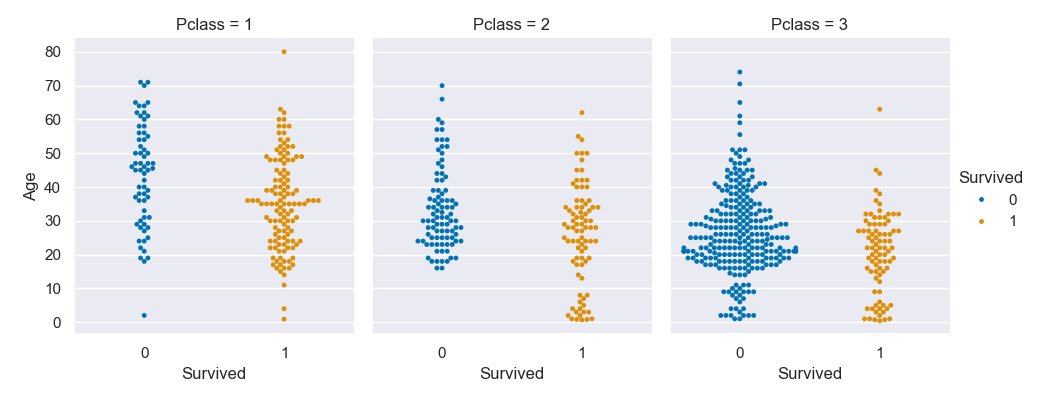

In [22]:
sns.catplot(data=df_labelled, x='Survived', hue='Survived', y='Age', col='Pclass', kind='swarm', height=4, aspect=0.8, size=3.5)
plt.show()

From the graph, we can see that:
- children from the first and second class had a high survival rate. This does not apply to children from the third class.
- older people seem to have an ever decreasing survival rate as class increases (1 > 2 > 3).

## Survival rate for SibSp and Parch

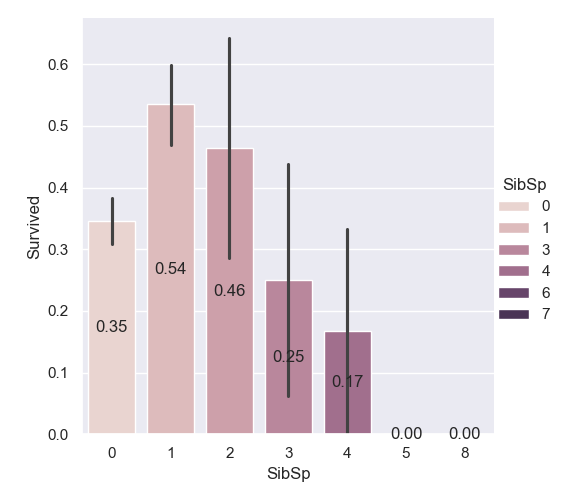

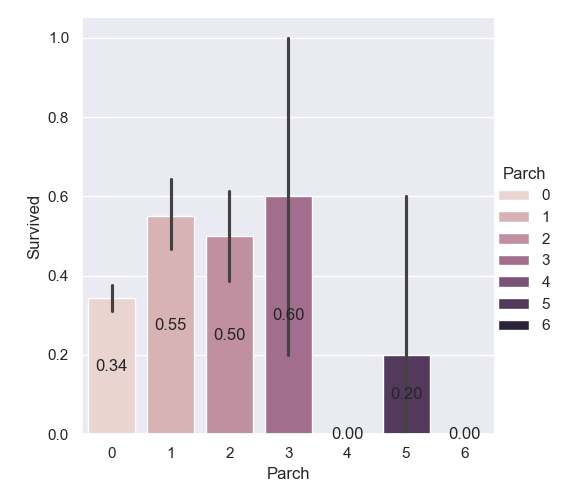

In [23]:
for feature in ["SibSp", "Parch"]:
    g = sns.catplot(x=feature, hue=feature, y="Survived", data=df_labelled, kind="bar")
    
    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, -1)

    # iterate through the axes containers
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')
    
    plt.show()

- Given SibSp, we can see that the highest survival rate is for people with 1 sibling/spouse, followed by those with 2 siblings/spouses. The confidence interval of the latter however is quite large, so it may not be very reliable.
- Given Parch, we can see that the highest survival rate is for people with 3 parents/children, followed by those with 1 parents/children. The confidence interval of the former is very large, so it's not very reliable.

## Save the datasets

In [24]:
df_labelled.to_pickle('dataset/df_labelled.pkl')
df_unlabelled.to_pickle('dataset/df_unlabelled.pkl')